In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

#proses 

df = pd.read_excel('Indonlu_Sentiment.xlsx')
print(df)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
print(f'Train shape: {X_train.shape}, Test Shape: {X_test.shape}')

                                                   Tweet     Label
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2      lokasi strategis di jalan sumatera bandung . t...  positive
3      betapa bahagia nya diri ini saat unboxing pake...  positive
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative
...                                                  ...       ...
12755  film tncfu , tidak cocok untuk penonton yang t...  negative
12756  indihome ini mahal loh bayar nya . hanya , pen...  negative
12757  be de gea , cowok cupu yang takut dengan pacar...  negative
12758  valen yang sangat tidak berkualitas . konentat...  negative
12759  restoran ini menjadi tempat pilihan saya berbu...  positive

[12760 rows x 2 columns]


NameError: name 'X' is not defined

In [15]:
from sklearn.naive_bayes import MultinominalNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinominalNB() #membangun model naive_bayes
nb_model.fit(X_train, y_train)
#memprediksi label untuk data uji
y_pred_nb = nb_model.predict(X_test)

#evaluasi model
print("Akurasi Naive Bayes: ", accuracy_score(y_train, y_test))
print(classification_report(y_test, y_pred_nb))

ImportError: cannot import name 'MultinominalNB' from 'sklearn.naive_bayes' (c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py)

In [16]:
from sklearn.tree import DecisionTreeClassifier

#membangun model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#prediksi label
y_pred_dt = dt_model.predict(X_test)

#evaluasi model
print("Akurasi Decision Tree: ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


NameError: name 'X_train' is not defined

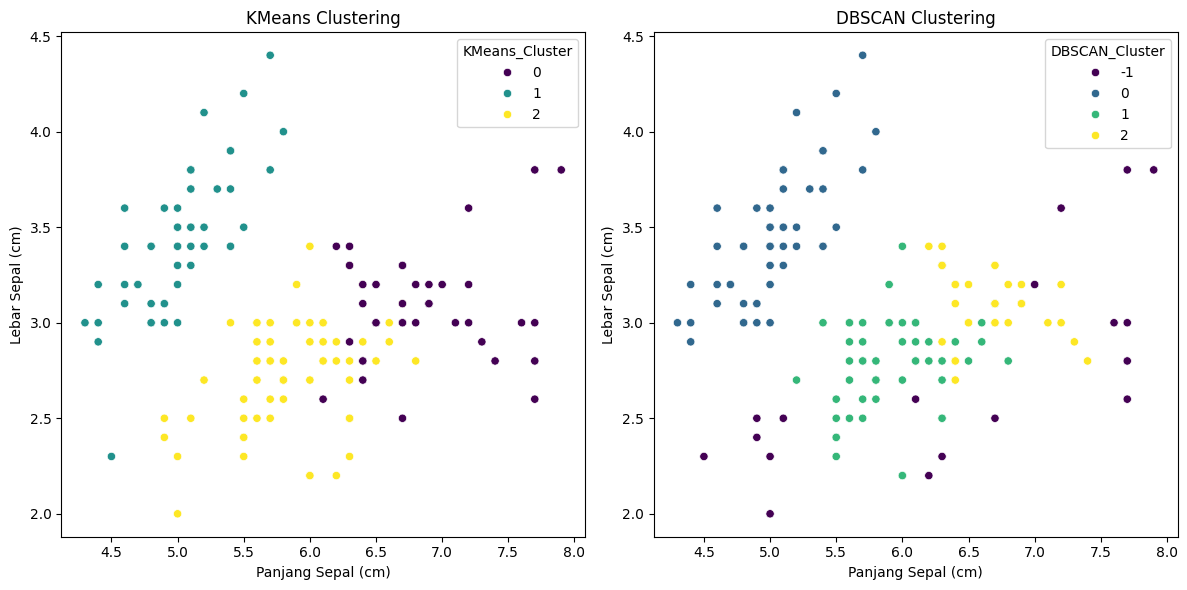

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Memuat dataset iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data)

# Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data)


# Visualisasi hasil KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='KMeans_Cluster', palette='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Panjang Sepal (cm)')
plt.ylabel('Lebar Sepal (cm)')

# Visualisasi hasil DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='DBSCAN_Cluster', palette='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Panjang Sepal (cm)')
plt.ylabel('Lebar Sepal (cm)')

plt.tight_layout()
plt.show()

In [25]:
# Hitung dan cetak silhouette score untuk masing-masing metode
kmeans_silhouette = silhouette_score(data.iloc[:, :-2], data['KMeans_Cluster'])
dbscan_silhouette = silhouette_score(data.iloc[:, :-2], data['DBSCAN_Cluster'])

print(f'Silhouette Score KMeans: {kmeans_silhouette}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')

Silhouette Score KMeans: 0.551191604619592
Silhouette Score DBSCAN: 0.4490275206491514


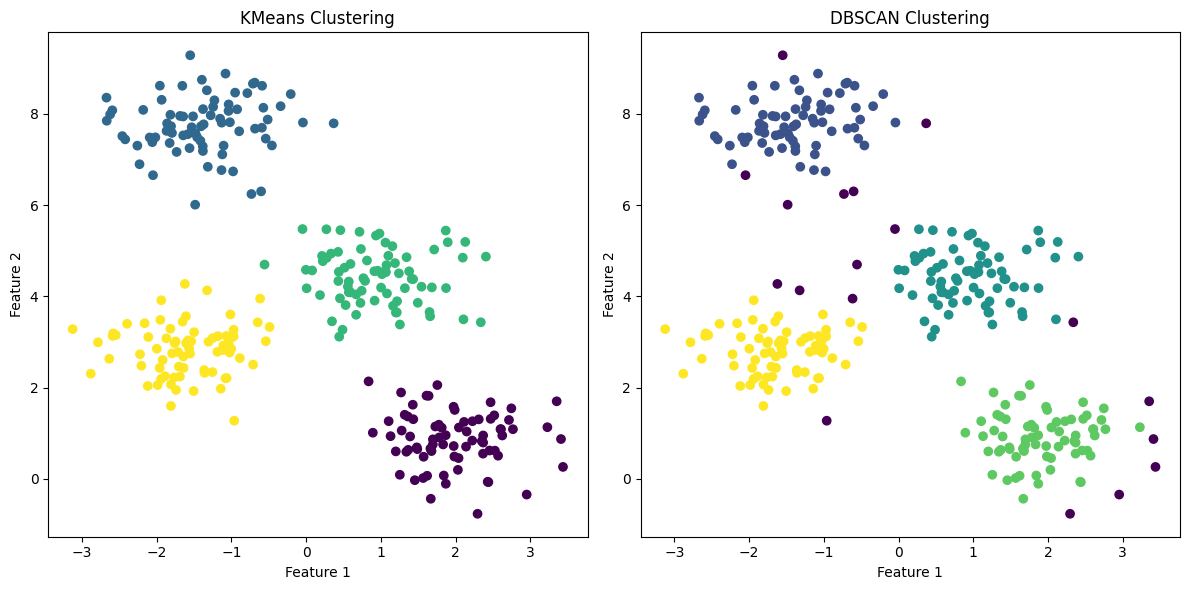

Silhouette Score KMeans: 0.6819938690643478
Silhouette Score DBSCAN: 0.6303800996842714


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Buat dataset buatan
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Konversi data menjadi DataFrame
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=4)
data['KMeans_Cluster'] = kmeans.fit_predict(X)

# Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualisasi hasil KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['KMeans_Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualisasi hasil DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Hitung dan cetak silhouette score untuk masing-masing metode
kmeans_silhouette = silhouette_score(X, data['KMeans_Cluster'])
dbscan_silhouette = silhouette_score(X, data['DBSCAN_Cluster'])

print(f'Silhouette Score KMeans: {kmeans_silhouette}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')